In [2]:
%matplotlib inline
from __future__ import division
import cvxpy as cvx
import cvxopt
import svmcmpl
import matplotlib.pyplot as plt
import numpy as np

[3.0, 3.0] [1.0, 1.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [3.0, 1.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [5.0, 1.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [1.0, 3.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [1.0, 5.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [3.0, 5.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [5.0, 3.0]
x (250, 2) y (250,)Generated
[3.0, 3.0] [5.0, 5.0]
x (250, 2) y (250,)Generated
x (2000, 2) y (2000,)


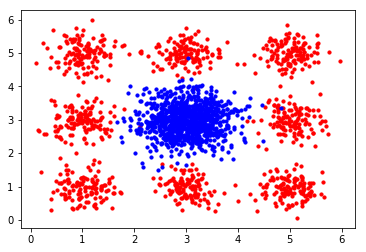

In [3]:
###Data Generation
DIM = 2
COLORS = ['red', 'blue']
np.random.seed(2)

fig, ax = plt.subplots()
def generate_gaussian(m, c, num):
    return np.random.multivariate_normal(m, c, num)
def plot_data_with_labels(ax, x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li], s=10)
def evaluate(y_hat, y_test):
    num_right = np.sum(y_hat==y_test)
    num_total = y_test.shape[0]
    num_wrong = num_total - num_right
    top1accuracy = num_right/(num_total)
    top1error = num_wrong/num_total
    print "correct rate : ", num_right, "/", num_total
    print "top 1 accuracy", top1accuracy
    print "top 1 error", top1error

def generate_dataset_pair(M1,M2,C1,C2,NUM_total,NUM_test):
    x1 = generate_gaussian(M1, C1, NUM_total)
    y1 = np.ones((x1.shape[0],))
    x2 = generate_gaussian(M2, C2, NUM_total)
    y2 = -np.ones((x2.shape[0],))
    x_train = np.concatenate((x1[:-NUM_test,:], x2[:-NUM_test,:]), axis = 0)
    x_test = np.concatenate((x1[-NUM_test:,:], x2[-NUM_test:,:]), axis =0)
    y_train = np.concatenate((y1[:-NUM_test], y2[:-NUM_test]), axis = 0)
    y_test = np.concatenate((y1[-NUM_test:], y2[-NUM_test:]), axis = 0)
    print M1.tolist(), M2.tolist()
    print('x {} y {}'.format(x_train.shape, y_train.shape) + "Generated")
    train_set = (x_train, y_train)
    test_set = (x_test, y_test)
    return train_set, test_set

NUM = 125
NUM_test = int(NUM*0.2)
NUM_total = NUM + NUM_test

M1 = (3,3) * np.ones((DIM,))
M2 = np.ones((DIM,))
C1 = np.diag(0.2 * np.ones((DIM,)))
C2 = np.diag(0.1 * np.ones((DIM,)))

train_set, test_set = generate_dataset_pair(M1,M2,C1,C2,NUM_total,NUM_test)
x_train = train_set[0]
y_train = train_set[1]
x_test = test_set[0]
y_test = test_set[1]

def get_another_pair(new_cor_1, new_cor_2, x_train, y_train, x_test, y_test):
    M1 = new_cor_1 * np.ones((DIM,))
    M2 = new_cor_2 * np.ones((DIM,))
    C1 = np.diag(0.2 * np.ones((DIM,)))
    C2 = np.diag(0.1 * np.ones((DIM,)))
    train_set, test_set = generate_dataset_pair(M1,M2,C1,C2,NUM_total,NUM_test)
    x_train = np.concatenate((x_train,train_set[0]), axis=0)
    y_train = np.concatenate((y_train,train_set[1]), axis=0)
    x_test = np.concatenate((x_test,test_set[0]), axis=0)
    y_test = np.concatenate((y_test,test_set[1]), axis=0)
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = get_another_pair((3,3),(3,1),x_train, y_train, x_test, y_test)
x_train, y_train, x_test, y_test = get_another_pair((3,3),(5,1),x_train, y_train, x_test, y_test)
x_train, y_train, x_test, y_test = get_another_pair((3,3),(1,3),x_train, y_train, x_test, y_test)
x_train, y_train, x_test, y_test = get_another_pair((3,3),(1,5),x_train, y_train, x_test, y_test)
x_train, y_train, x_test, y_test = get_another_pair((3,3),(3,5),x_train, y_train, x_test, y_test)
x_train, y_train, x_test, y_test = get_another_pair((3,3),(5,3),x_train, y_train, x_test, y_test)
x_train, y_train, x_test, y_test = get_another_pair((3,3),(5,5),x_train, y_train, x_test, y_test)
# x_train, y_train, x_test, y_test = get_another_pair((10,5),(7.5,2),x_train, y_train, x_test, y_test)
# x_train, y_train, x_test, y_test = get_another_pair((10.5,2),(10,11),x_train, y_train, x_test, y_test)
# x_train, y_train, x_test, y_test = get_another_pair((10.5,8),(13,2),x_train, y_train, x_test, y_test)
# x_train, y_train, x_test, y_test = get_another_pair((12,5),(13,8),x_train, y_train, x_test, y_test)
# x_train, y_train, x_test, y_test = get_another_pair((6,4),(8,8),x_train, y_train, x_test, y_test)

print('x {} y {}'.format(x_train.shape, y_train.shape))
plot_data_with_labels(ax, x_train, y_train)
NUM_train = int(x_train.shape[0])
NUM_test = int(x_test.shape[0])
NUM_total = NUM_train + NUM_test

In [15]:
X = cvxopt.matrix(x_train)
d = cvxopt.matrix(y_train)
gamma = 2.0; kernel = 'rbf'; sigma = 1.0; width = 20
sol1 = svmcmpl.softmargin(X, d, gamma, kernel, sigma)

building kernel matrix ..
     pcost       dcost       gap    pres   dres
 0: -5.4979e+01 -2.2221e+03  7e+03  9e-01  3e-15
 1: -3.2268e+01 -5.5834e+02  7e+02  6e-02  2e-15
 2: -3.5805e+01 -1.4554e+02  1e+02  9e-03  4e-15
 3: -4.6797e+01 -9.2404e+01  5e+01  3e-03  3e-15
 4: -5.2319e+01 -7.4423e+01  2e+01  1e-03  2e-15
 5: -5.5005e+01 -6.7179e+01  1e+01  5e-04  2e-15
 6: -5.6684e+01 -6.3053e+01  7e+00  2e-04  2e-15
 7: -5.7788e+01 -6.0646e+01  3e+00  5e-05  2e-15
 8: -5.8529e+01 -5.9365e+01  8e-01  9e-07  3e-15
 9: -5.8842e+01 -5.8952e+01  1e-01  2e-08  3e-15
10: -5.8895e+01 -5.8897e+01  2e-03  3e-10  3e-15
11: -5.8896e+01 -5.8896e+01  2e-05  3e-12  3e-15
Optimal solution found.
utime = 0.510000, stime = 0.870000.
45 support vectors.
class 1: 3/400 = 0.8% misclassified.
class 2: 4/400 = 1.0% misclassified.


In [16]:
X_test = cvxopt.matrix(x_test)
y_hat = np.array(sol1['classifier'](X_test)).squeeze()
num_right = np.sum(y_hat==y_test)
num_total = y_test.shape[0]
evaluate(y_hat,y_test)

correct rate :  156 / 160
top 1 accuracy 0.975
top 1 error 0.025


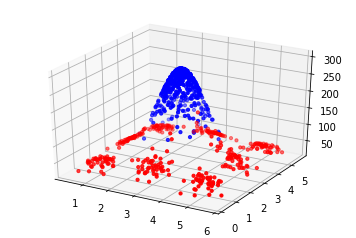

In [20]:
sigma = 1
rbf_temp = np.empty([NUM_train,NUM_train])
for i in range(NUM_train):
    for j in range(NUM_train):
        rbf_temp[i,j] = np.square(np.linalg.norm(x_train[i]-x_train[j]))
rbf_temp2 = -rbf_temp/np.square(sigma)
rbf_kernel = np.exp(rbf_temp2)

z_ = np.empty([NUM_train,])
for j in range(NUM_train):
    sum_val_i=0
    for i in range(NUM_train):
        sum_val_i += rbf_kernel[i,j]
    z_[j] = sum_val_i

from mpl_toolkits.mplot3d import Axes3D
figt = plt.figure()
axt = figt.add_subplot(111, projection='3d')
unique = np.unique(y_train)
z_plot = np.expand_dims(z_,1)
for li in range(len(unique)):
    x_sub = x_train[y_train == unique[li]]
    x_sub_z = z_plot[y_train == unique[li]]
    axt.scatter(x_sub[:, 0], x_sub[:, 1], x_sub_z[:,0], zdir='z',c = COLORS[li], s=10)